# Data Preprocessing
## 1. Oulier Detection and Removal
## 2. Handling Missing Values
   1. Removing Rows/Columns with NA values
     2. Filling in with statistical measures
     3. Simple Imputer
## 3. Formatting Data
## 4. Removing Duplicates
## 5. Encoding Categorical Data

## Import Library and Load Dataset

In [33]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [34]:
df = pd.read_csv("nba.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [35]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [36]:
df.describe(include=["object"])

,Name,Team,Position,Height,College
count,457,457,457,457,373
unique,457,30,5,18,118
top,Avery Bradley,New Orleans Pelicans,SG,6-9,Kentucky
freq,1,19,102,59,22


## 1. Outlier Detection and Removal

<Axes: >

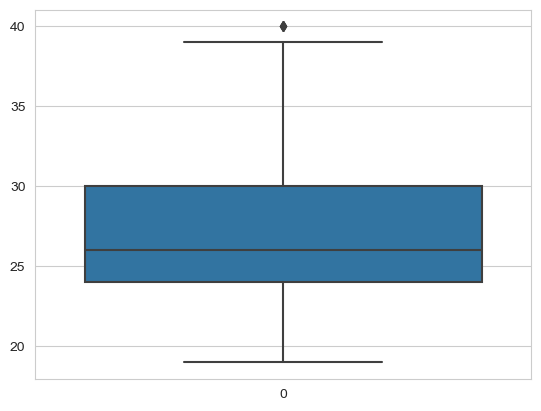

In [37]:
sns.boxplot(df["Age"])

In [38]:
print(df["Age"].median())

26.0


<Axes: xlabel='Age', ylabel='Salary'>

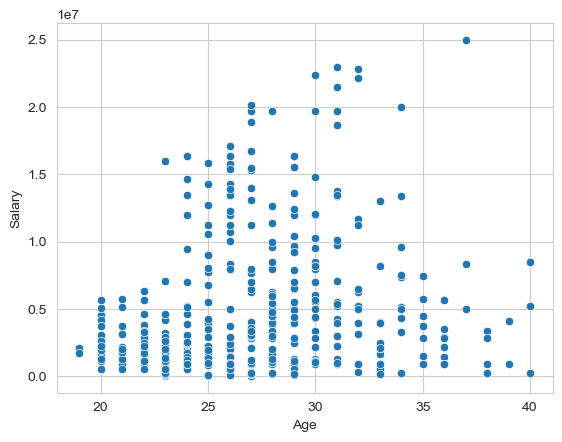

In [39]:
sns.scatterplot(x=df["Age"], y=df["Salary"])

In [40]:
df[df["Age"] < 20]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
122,Devin Booker,Phoenix Suns,1.0,SG,19.0,6-6,206.0,Kentucky,2127840.0
226,Rashad Vaughn,Milwaukee Bucks,20.0,SG,19.0,6-6,202.0,UNLV,1733040.0


In [41]:
df[df["Age"] > 39]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
298,Tim Duncan,San Antonio Spurs,21.0,C,40.0,6-11,250.0,Wake Forest,5250000.0
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,6-3,200.0,Utah,250750.0
400,Kevin Garnett,Minnesota Timberwolves,21.0,PF,40.0,6-11,240.0,NaN,8500000.0


In [42]:
a = np.where(df["Age"] > 39)

In [43]:
df.drop(index=a[0], inplace=True)

In [44]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


<Axes: >

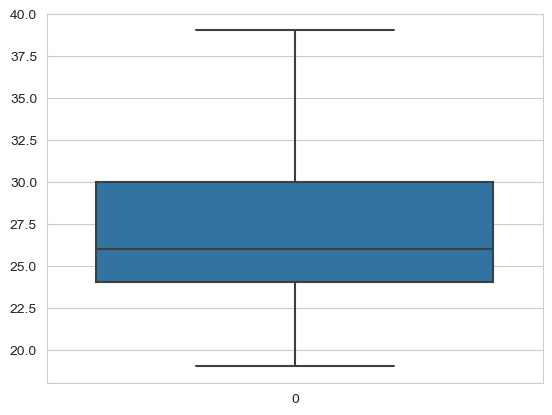

In [45]:
sns.boxplot(df["Age"])
# Outliers Removed

## 2. Removing Null Values
### a. Removing Rows/Columns with Null Values

In [60]:
df["Name"].isna().sum()

1

In [51]:
np.where(df["Name"].isna())

(array([454]),)

In [61]:
df.loc[454,:]

Name        Raul Neto
Team        Utah Jazz
Number           25.0
Position           PG
Age              24.0
Height            6-1
Weight          179.0
College           NaN
Salary       900000.0
Name: 454, dtype: object

In [58]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
